# GenericFormulaFinder (GFF)
___
#### Ce papier donne au lecteur un outil pour facilement trouver l'approximation d'un polynome correspondant à une suite (si celle-ci s'assimile à un polynome).

Ces résultats pourront ensuite être prouvés par hypothèse de récurrence.

In [1286]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

import fractions
np.set_printoptions(formatter={'all':lambda x: str(fractions.Fraction(x).limit_denominator())})  # Va afficher la fractin

## Paramètres de calcul de la suite :

**nbr_points : ** Le nombre de points de la suite à **afficher** à l'écran (_sert à mieux visualiser les résultats_)

**offset : ** Le rang à partir duquel commencer à calculer les termes de la suite

**n : ** Le nombre de points de la suite à **calculer**. Un n assez petit (10 ou moins) est recommandé car il permet de créer "à la main" y.

In [1292]:
nbr_points = 30  # Pas exact comme valeur
offset = 0
n = 10
degre_max = 6

In [1241]:
def approx_zeros(li):
    for i in range(0, len(li) + 1):
        if(li[i] < 1e-9):  # Valeur seuil
            p[i] = 0

## Expression de la suite :

Modifiez la liste **y** ci-dessous pour qu'elle corresponde aux premières valeurs de votre suite

_n et offset ont déjà étés définis_

Faîtes bien attention à faire correspondre x et y

In [1293]:
ecart = int((n-offset)/(nbr_points-1) + 1)
nom_suite = "Somme des cubes"
y = [sum([k**3 for k in range(j)]) for j in range(1, n+1, ecart)]
print("LONG_Y :", len(y))

LONG_Y : 10


In [1294]:
x = np.array([int(i) for i in range(offset, n + offset, ecart)])
print("LONG_X :", len(x))
df = pd.DataFrame({"un(n)":y, "n":x,})
df

LONG_X : 10


,n,un(n)
0,0,0
1,1,1
2,2,9
3,3,36
4,4,100
5,5,225
6,6,441
7,7,784
8,8,1296
9,9,2025


## Détermination du degré du polynome, de ses coefficients et de ses racines

Le coefficient est de la forme : **[an, a(n-1), ..., a1 ,a0]** pour une fonction du type : **f(x) = an*x^n + a(n-1)*x^(n-1) + ... + a1*x + a0**

Ex:
[0.5 0.5 0] <=> 0.5*x^2 + 0.5*x

In [1295]:
p = np.poly1d(np.polyfit(x, y, degre_max))
approx_zeros(p)
degre = degre_max
i = 0

while(p.c[0] == 0):
    degre = degre - 1
    p = np.poly1d(np.polyfit(x, y, degre))
    approx_zeros(p)

print("Degré :" ,len(p.c))
print("Coefficients :", list(p.c))
print("Racines : ", p.r)

Degré : 5
Coefficients : [0.24999999999999961, 0.50000000000000611, 0.24999999999995609, 0.0, 0.0]
Racines :  [-1 -1 0 0]


___
# Visualisation du résultat

Nous voyons ici nos deux courbes.


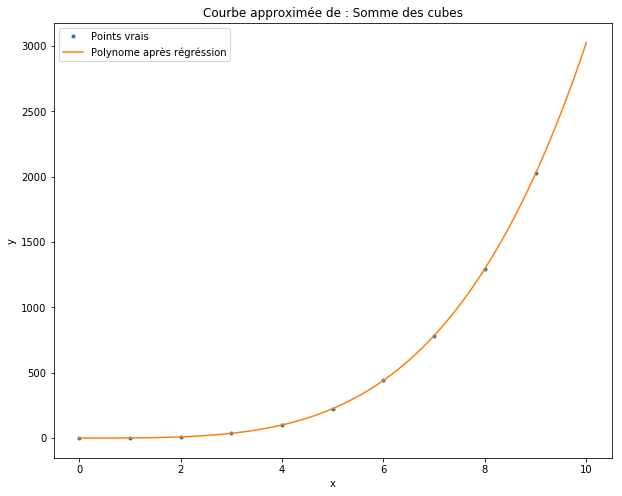

In [1296]:
plt.figure(figsize=(10, 8))
xp = np.linspace(offset, n+offset, 100)
_ = plt.plot(x, y, '.', label = 'Points vrais')
_ = plt.plot(xp, p(xp), '-', label = 'Polynome après régréssion')

plt.xlabel('x')
plt.ylabel('y')
plt.title("Courbe approximée de : " + nom_suite)


plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})
plt.show()

# Estimation de la formule :
S'obtient avec le premier coefficient et les racines
Pour rendre le truc beau, on pourrait faire en sorte que les racines soient multipliées jsuqu'à être entières.

In [1302]:
A = "1/(" + str(round(1/p.c[0], 3))+")"
X = ""
for i in p.r:
    X += "(n+" + str(round(-i, 3)) + ")"
print("ESTIMATION DE LA FORMULE :", A + "[" + X + "]\n")

ESTIMATION DE LA FORMULE : 1/(4.0)[(n+1.0)(n+1.0)(n+-0.0)(n+-0.0)]



## Tableau de valeurs
Valeurs de n et de Un pour pouvoir vérifier

In [1298]:
a = [p(n) for n in range(len(df))]
df["Estimé"] = a
df["Erreur"] = round(abs(df["un(n)"] - df["Estimé"]), 2)
print("EREUR :", df["Erreur"].sum())
df

EREUR : 0.0


,n,un(n),Estimé,Erreur
0,0,0,0.0,0.0
1,1,1,1.0,0.0
2,2,9,9.0,0.0
3,3,36,36.0,0.0
4,4,100,100.0,0.0
5,5,225,225.0,0.0
6,6,441,441.0,0.0
7,7,784,784.0,0.0
8,8,1296,1296.0,0.0
9,9,2025,2025.0,0.0


# TESTS
___

In [1248]:
y = [sum([k**3 for k in range(j)]) for j in range(1, 10)]
print(y)

[0, 1, 9, 36, 100, 225, 441, 784, 1296]
